In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
from scipy import stats
from sklearn import preprocessing

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


|label|1|2|3|4|5|6|7|8|9|10|
|-|-|
|genre|'Pop_Rock'|'Electronic'|'Rap'|'Jazz'|'Latin'|'RnB'|'International'|'Country'|'Reggae'|'Blues'|

### training data

In [3]:
train_labels = pd.read_csv("./data/train_labels.csv", header=None)
print(train_labels.shape)
train_labels.head()

(4363, 1)


,0
0,1
1,1
2,1
3,1
4,1


In [4]:
train_data = pd.read_csv("./data/train_data.csv", header=None)
print(train_data.shape)
train_data.head()

(4363, 264)


,0,1,2,3,4,5,6,7,8,9,...,254,255,256,257,258,259,260,261,262,263
0,1040.7,2315.6,2839.1,2552.2,2290.4,1913.8,2152.6,1930.3,2079.3,1706.7,...,0.216490,0.36548,0.093584,0.166870,0.083426,0.118090,0.089792,0.074371,0.073162,0.059463
1,2309.4,4780.4,4055.7,3120.5,1979.9,2343.6,2634.2,3208.5,3078.0,3374.7,...,0.100670,0.14739,0.102560,0.213040,0.082041,0.080967,0.076450,0.052523,0.052357,0.055297
2,2331.9,4607.0,4732.3,5007.0,3164.9,3171.9,2915.7,3282.3,2400.0,1895.2,...,0.126760,0.36321,0.114200,0.223780,0.100770,0.186910,0.067270,0.061138,0.085509,0.049422
3,3350.9,6274.4,5037.0,4609.7,3438.8,3925.8,3746.4,3539.4,3053.7,3075.4,...,0.096479,0.28950,0.074124,0.201580,0.049032,0.130210,0.045800,0.080885,0.148910,0.042027
4,2017.6,3351.8,2924.9,2726.3,1979.9,1930.9,2083.4,1889.2,1695.4,1911.7,...,0.138340,0.38266,0.079402,0.063495,0.053717,0.086750,0.062090,0.048999,0.033159,0.070813


In [5]:
train_labels[0].unique()

array([ 1,  5,  4,  2,  6, 10,  3,  7,  9,  8])

### data preprocessing

we know that 

1) 1 to 168: Rhythm pattern
- mean
- median
- variance
- kurtosis
- skewness
- min
- max

2) 169 to 216: Chroma
- mean
- std
- min
- max

3)  217 to 264: MFCCs (Mel Frequency Cepstral Coefficients)
- mean
- std
- min
- max


In [6]:
rhythm_feature_set = train_data.iloc[:,0:168]
chroma_feature_set = train_data.iloc[:,168:216]
mfcc_feature_set = train_data.iloc[:,216:]

In [7]:
features = pd.DataFrame()
features["rhythm_mean"] = rhythm_feature_set.apply(np.mean, axis=1)
features["rhythm_median"] = rhythm_feature_set.apply(np.median, axis=1)
features["rhythm_variance"] = rhythm_feature_set.apply(np.var, axis=1)

features["rhythm_kurtosis"] = rhythm_feature_set.apply(stats.kurtosis, axis=1)
features["rhythm_skewness"] = rhythm_feature_set.apply(stats.skew, axis=1)

features["rhythm_min"] = rhythm_feature_set.apply(np.min, axis=1)
features["rhythm_max"] = rhythm_feature_set.apply(np.max, axis=1)

features["chroma_mean"] = chroma_feature_set.apply(np.mean, axis=1)
features["chroma_std"] = chroma_feature_set.apply(np.std, axis=1)
features["chroma_min"] = chroma_feature_set.apply(np.min, axis=1)
features["chroma_max"] = chroma_feature_set.apply(np.max, axis=1)

features["mfcc_mean"] = mfcc_feature_set.apply(np.mean, axis=1)
features["mfcc_std"] = mfcc_feature_set.apply(np.std, axis=1)
features["mfcc_min"] = mfcc_feature_set.apply(np.min, axis=1)
features["mfcc_max"] = mfcc_feature_set.apply(np.max, axis=1)

In [8]:
features.head(7)

,rhythm_mean,rhythm_median,rhythm_variance,rhythm_kurtosis,rhythm_skewness,rhythm_min,rhythm_max,chroma_mean,chroma_std,chroma_min,chroma_max,mfcc_mean,mfcc_std,mfcc_min,mfcc_max
0,3186.884054,1520.45,1.355423e+08,149.134782,12.035399,0.016,150390.0,0.347344,0.396084,0.002,1.0,83333.576956,276385.325742,-0.19229,1000000.0
1,2721.480839,2254.05,6.356003e+06,1.394458,1.370253,0.000,11090.0,0.371001,0.399262,0.002,1.0,83333.445326,276385.365429,-0.23789,1000000.0
2,3063.031202,2144.65,9.463125e+06,1.005046,1.351375,-45.887,12707.0,0.337415,0.397231,0.002,1.0,83333.624873,276385.311295,-0.23153,1000000.0
3,3576.968470,3064.55,9.182377e+06,1.559031,1.354329,0.000,13815.0,0.358995,0.389015,0.012,1.0,83333.421559,276385.372595,-0.11490,1000000.0
4,2476.953321,1897.95,4.677566e+06,1.502884,1.231454,0.000,10880.0,0.406539,0.387381,0.033,1.0,83333.455130,276385.362473,-0.13230,1000000.0
5,2670.196917,1949.05,6.091830e+06,1.782056,1.414759,0.000,12233.0,0.375086,0.395581,0.011,1.0,83333.426332,276385.371156,-0.25169,1000000.0
6,3990.292643,3480.05,1.087766e+07,1.671772,1.333714,0.000,15833.0,0.376399,0.392857,0.019,1.0,83333.406828,276385.377037,-0.38725,1000000.0


### drop non-unique columns

In [9]:
for header in features.columns:
    n_unique = features[header].nunique()
    if  n_unique < 20:
        print(header, n_unique)
        features.drop([header], axis=1, inplace=True)
        
# we can drop these

chroma_max 1
mfcc_max 1


In [10]:
features.head(7)

,rhythm_mean,rhythm_median,rhythm_variance,rhythm_kurtosis,rhythm_skewness,rhythm_min,rhythm_max,chroma_mean,chroma_std,chroma_min,mfcc_mean,mfcc_std,mfcc_min
0,3186.884054,1520.45,1.355423e+08,149.134782,12.035399,0.016,150390.0,0.347344,0.396084,0.002,83333.576956,276385.325742,-0.19229
1,2721.480839,2254.05,6.356003e+06,1.394458,1.370253,0.000,11090.0,0.371001,0.399262,0.002,83333.445326,276385.365429,-0.23789
2,3063.031202,2144.65,9.463125e+06,1.005046,1.351375,-45.887,12707.0,0.337415,0.397231,0.002,83333.624873,276385.311295,-0.23153
3,3576.968470,3064.55,9.182377e+06,1.559031,1.354329,0.000,13815.0,0.358995,0.389015,0.012,83333.421559,276385.372595,-0.11490
4,2476.953321,1897.95,4.677566e+06,1.502884,1.231454,0.000,10880.0,0.406539,0.387381,0.033,83333.455130,276385.362473,-0.13230
5,2670.196917,1949.05,6.091830e+06,1.782056,1.414759,0.000,12233.0,0.375086,0.395581,0.011,83333.426332,276385.371156,-0.25169
6,3990.292643,3480.05,1.087766e+07,1.671772,1.333714,0.000,15833.0,0.376399,0.392857,0.019,83333.406828,276385.377037,-0.38725


In [11]:
explore = features.copy()
explore["labels"] = train_labels[0]
explore.head()

,rhythm_mean,rhythm_median,rhythm_variance,rhythm_kurtosis,rhythm_skewness,rhythm_min,rhythm_max,chroma_mean,chroma_std,chroma_min,mfcc_mean,mfcc_std,mfcc_min,labels
0,3186.884054,1520.45,1.355423e+08,149.134782,12.035399,0.016,150390.0,0.347344,0.396084,0.002,83333.576956,276385.325742,-0.19229,1
1,2721.480839,2254.05,6.356003e+06,1.394458,1.370253,0.000,11090.0,0.371001,0.399262,0.002,83333.445326,276385.365429,-0.23789,1
2,3063.031202,2144.65,9.463125e+06,1.005046,1.351375,-45.887,12707.0,0.337415,0.397231,0.002,83333.624873,276385.311295,-0.23153,1
3,3576.968470,3064.55,9.182377e+06,1.559031,1.354329,0.000,13815.0,0.358995,0.389015,0.012,83333.421559,276385.372595,-0.11490,1
4,2476.953321,1897.95,4.677566e+06,1.502884,1.231454,0.000,10880.0,0.406539,0.387381,0.033,83333.455130,276385.362473,-0.13230,1


In [12]:
import seaborn as sns

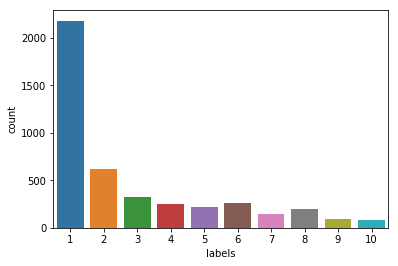

In [13]:
sns.countplot(x='labels',data=explore)

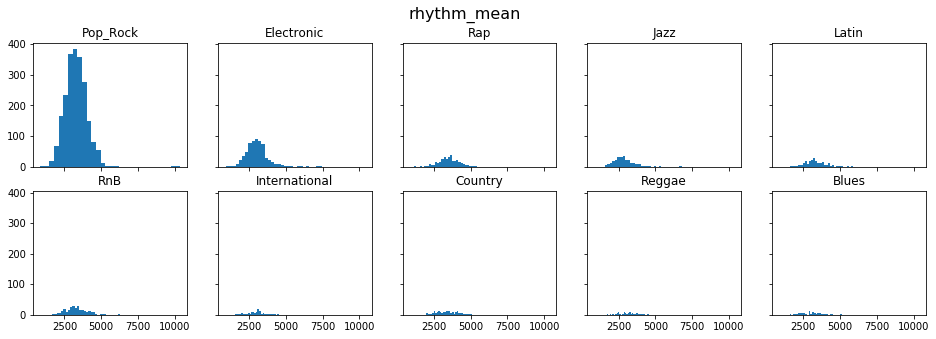

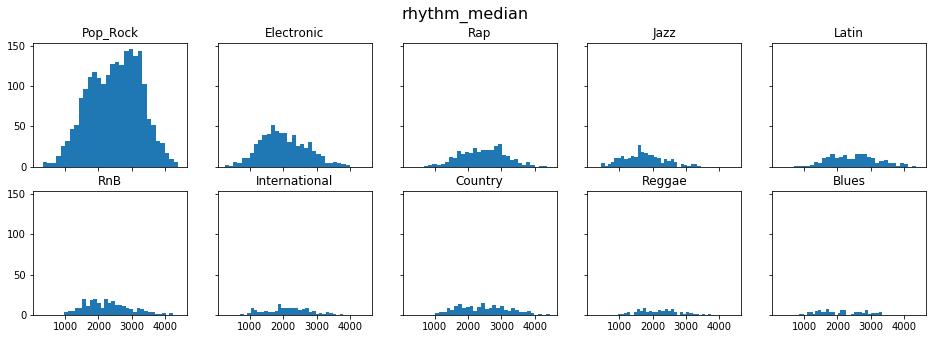

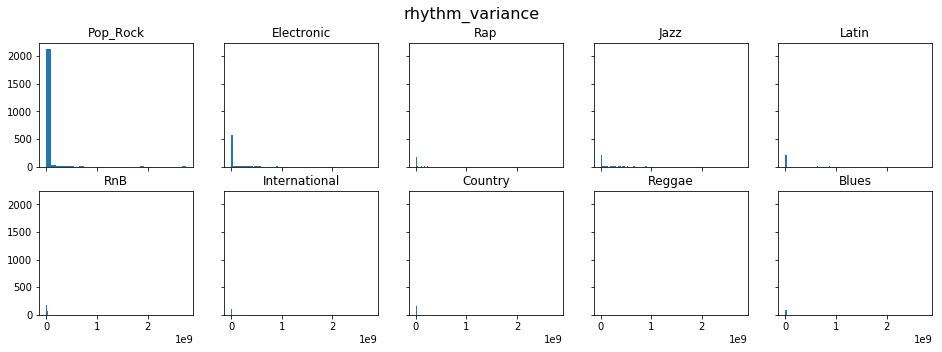

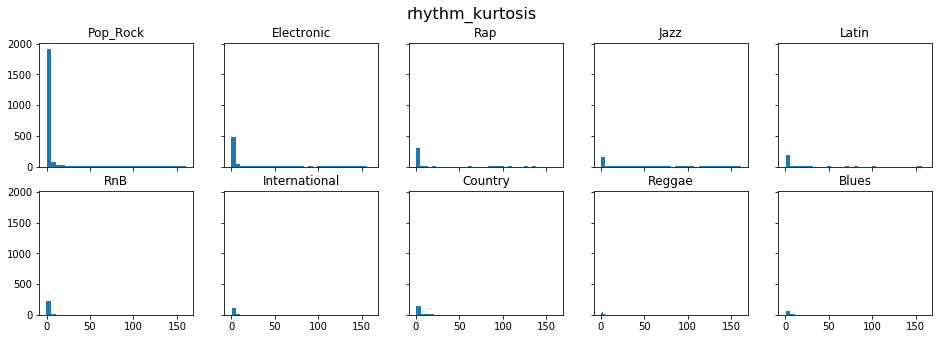

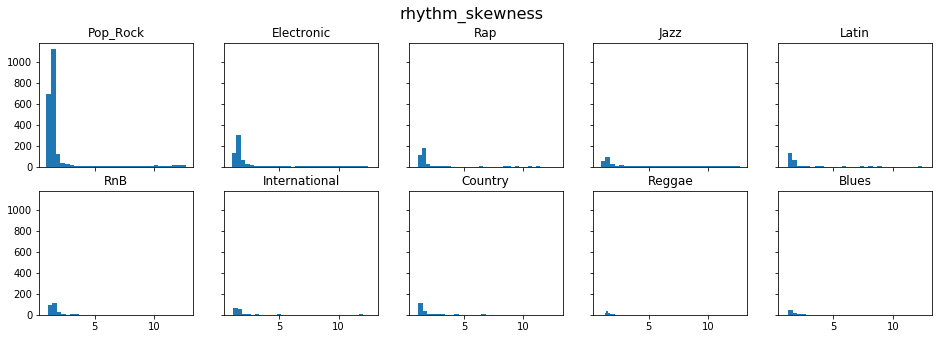

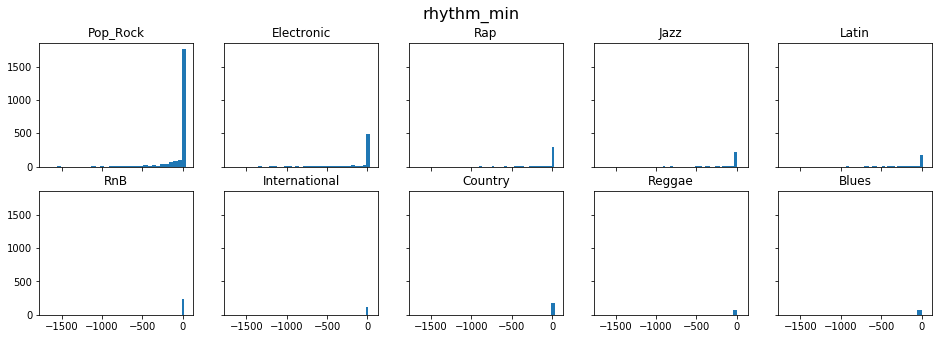

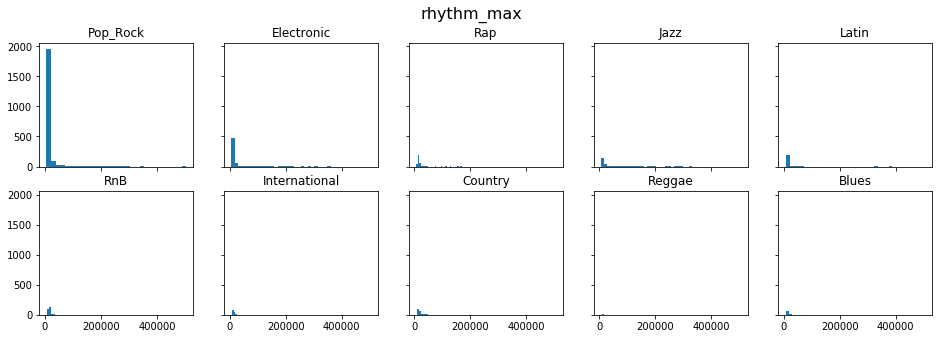

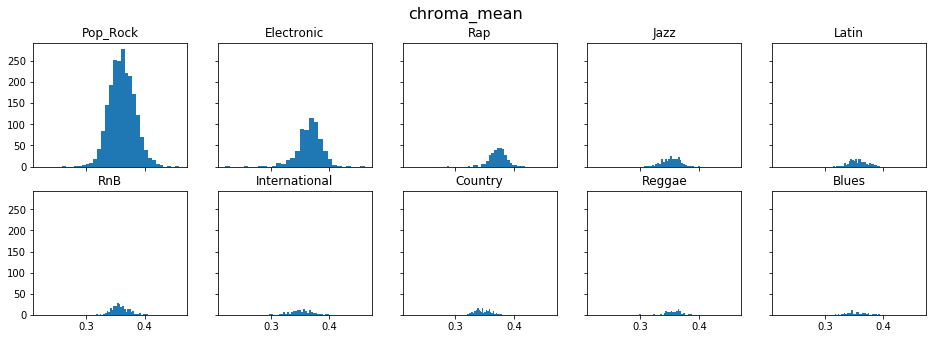

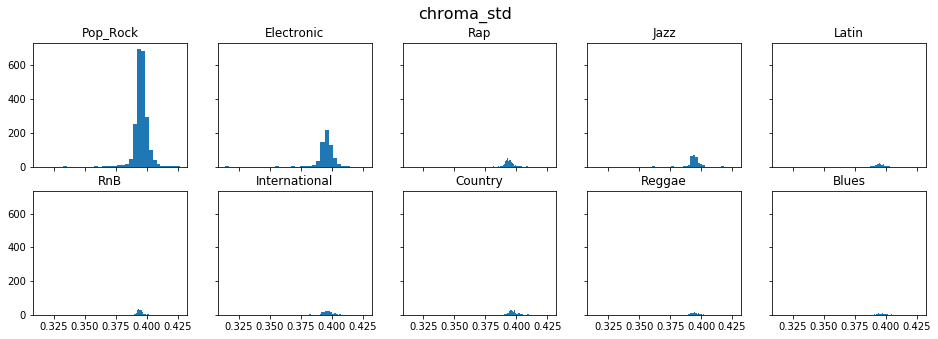

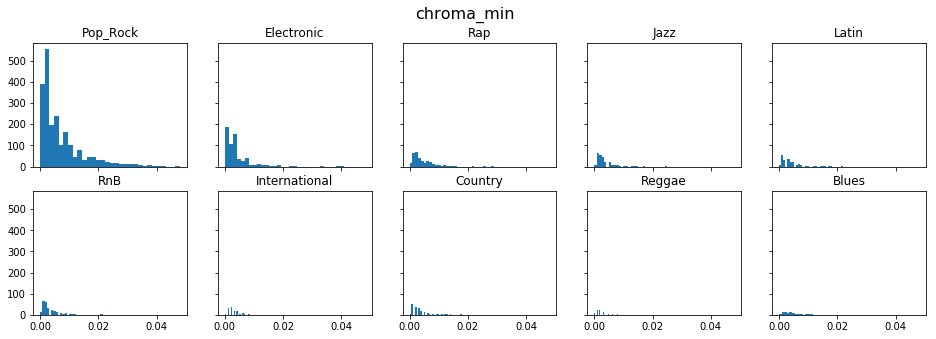

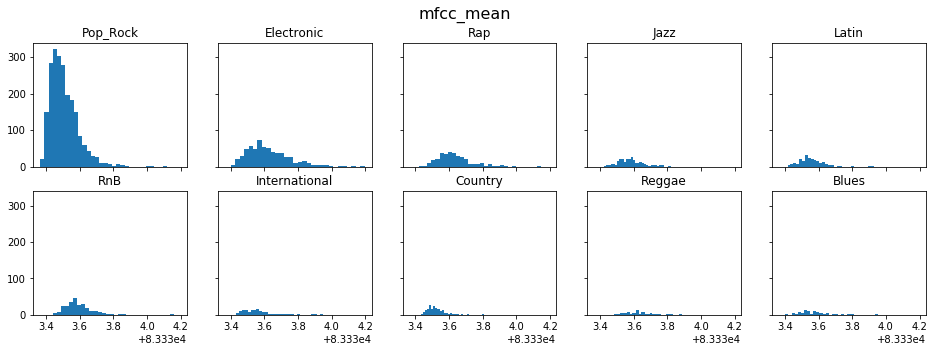

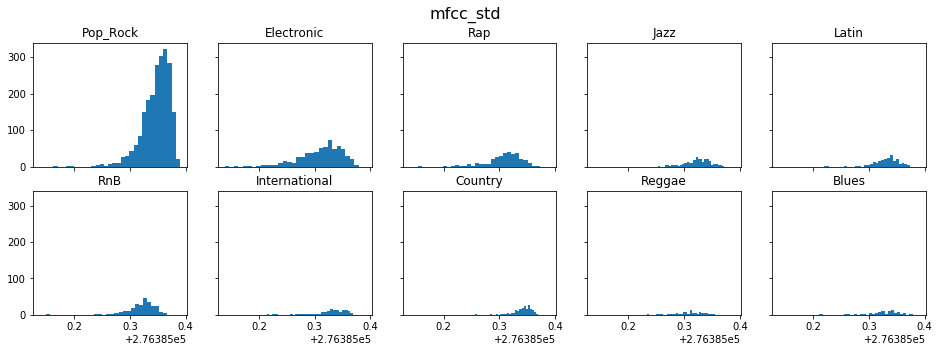

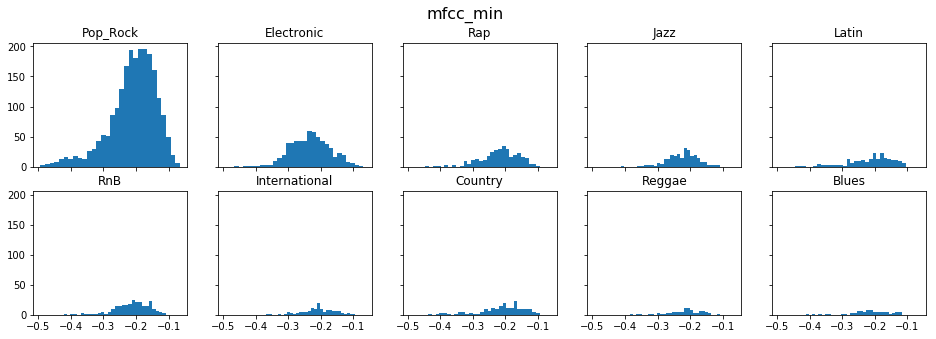

In [14]:
genre = ['Pop_Rock','Electronic','Rap','Jazz','Latin','RnB','International','Country','Reggae','Blues']

for feature in explore.columns:
    if feature == 'labels':
        continue

    fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(16,5), sharex=True, sharey=True)

    plt.suptitle(feature, fontsize=16)
    for i in range(10):
        plot = axes[int(i/5)][i%5]
        plot.hist(explore[explore['labels']==i+1][feature], bins=30)
        plot.set_title(genre[i])

    plt.show()


|label|1|2|3|4|5|6|7|8|9|10|
|-|-|
|genre|'Pop_Rock'|'Electronic'|'Rap'|'Jazz'|'Latin'|'RnB'|'International'|'Country'|'Reggae'|'Blues'|

In [15]:
norm_features = preprocessing.scale(features)
pd.DataFrame(norm_features).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.052428,-1.074996,1.562325,5.008887,4.629586,0.301845,3.681648,-0.670846,0.146959,-0.549161,0.257063,-0.257073,0.340391
1,-0.699543,-0.102663,-0.185238,-0.312025,-0.358710,0.301724,-0.346156,0.507465,0.781391,-0.549161,-1.021037,1.021045,-0.351700
2,-0.224638,-0.247665,-0.143207,-0.326050,-0.367539,-0.046628,-0.299401,-1.165373,0.375861,-0.549161,0.722337,-0.722350,-0.255172
3,0.489961,0.971595,-0.147005,-0.306098,-0.366158,0.301724,-0.267364,-0.090516,-1.264223,1.055773,-1.251812,1.251824,1.514972
4,-1.039543,-0.574648,-0.207943,-0.308120,-0.423629,0.301724,-0.352228,2.277548,-1.590448,4.426134,-0.925839,0.925846,1.250884


In [16]:
X_train, X_test, y_train, y_test = train_test_split(norm_features, train_labels[0], test_size=0.33)

In [17]:
from sklearn.linear_model import LogisticRegressionCV

In [18]:
initialModel = LogisticRegressionCV(solver='lbfgs', max_iter=10**6, cv=5)
initialModel.fit(X_train,y_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv=5, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=1000000,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [19]:
predictions = initialModel.predict(X_test)
predictions.shape

(1440,)

In [20]:
np.unique(predictions)

array([1, 2])

### Calculate accuracy by comparing $y_{pred}$ with $y_{true}$

In [21]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, predictions)

0.5305555555555556

# Using SVM

In [22]:
from sklearn.svm import SVC

In [23]:
svc_model = SVC()
svc_model.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [24]:
predictions = svc_model.predict(X_test)
accuracy_score(y_true=y_test, y_pred=predictions)

0.5472222222222223

In [25]:
from sklearn.model_selection import GridSearchCV

In [26]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001]} 

In [27]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.5s
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV] ................................... C=0.1, gamma=1, total=   0.5s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.5s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.3s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.3s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.3s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................................ C=0.1, gamma=0.01, total=   0.3s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................................ C=0.1, gamma=0.01, total=   0.3s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] .

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:   29.1s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [28]:
grid_predictions = grid.predict(X_test)
accuracy_score(y_true=y_test, y_pred=grid_predictions)

0.5416666666666666

# test data set

### build model using all train data

In [ ]:
# build model using all data

mainModel = LogisticRegressionCV(solver='lbfgs', max_iter=10**6, cv=5)
mainModel.fit(norm_features,train_labels[0])

### submission data

In [ ]:
test_data = pd.read_csv("./data/test_data.csv", header=None)

# extract feature
rhythm_feature_set = test_data.iloc[:,0:168]
chroma_feature_set = test_data.iloc[:,168:216]
mfcc_feature_set = test_data.iloc[:,216:]

features = pd.DataFrame()
features["rhythm_mean"] = rhythm_feature_set.apply(np.mean, axis=1)
features["rhythm_median"] = rhythm_feature_set.apply(np.median, axis=1)
features["rhythm_variance"] = rhythm_feature_set.apply(np.var, axis=1)

features["rhythm_kurtosis"] = rhythm_feature_set.apply(stats.kurtosis, axis=1)
features["rhythm_skewness"] = rhythm_feature_set.apply(stats.skew, axis=1)

features["rhythm_min"] = rhythm_feature_set.apply(np.min, axis=1)
features["rhythm_max"] = rhythm_feature_set.apply(np.max, axis=1)

features["chroma_mean"] = chroma_feature_set.apply(np.mean, axis=1)
features["chroma_std"] = chroma_feature_set.apply(np.std, axis=1)
features["chroma_min"] = chroma_feature_set.apply(np.min, axis=1)
features["chroma_max"] = chroma_feature_set.apply(np.max, axis=1)

features["mfcc_mean"] = mfcc_feature_set.apply(np.mean, axis=1)
features["mfcc_std"] = mfcc_feature_set.apply(np.std, axis=1)
features["mfcc_min"] = mfcc_feature_set.apply(np.min, axis=1)
features["mfcc_max"] = mfcc_feature_set.apply(np.max, axis=1)

print(features.shape)
features.head()

In [ ]:
for header in features.columns:
    n_unique = features[header].nunique()
    if  n_unique < 20:
        print(header, n_unique)
        features.drop([header], axis=1, inplace=True)
        
# we can drop these

In [ ]:
norm_features = preprocessing.scale(features)
pd.DataFrame(norm_features).head()

In [ ]:
predictions = mainModel.predict(norm_features)

In [ ]:
np.unique(predictions)

In [ ]:
predictions.shape

### submissionthings

In [ ]:
dummy = pd.read_csv("./data/dummy_solution_accuracy.csv")
print(dummy.shape)
dummy.head()

In [ ]:
submission = dummy.copy()
submission["Sample_label"] = predictions